<a href="https://colab.research.google.com/github/Fares00T/AI-Algorithms/blob/main/Hard_C_Means_(HCM)_and_Fuzzy_C_Means_(FCM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1 1 0 0 1 0 1 0]
 [0 0 1 1 0 1 0 1]]
Iteration 1, J-index: 1.1094
Cluster Assignments: [0 0 0 0 1 1 1 1]
Centroids: [[3.  3.5]
 [6.  5.5]]


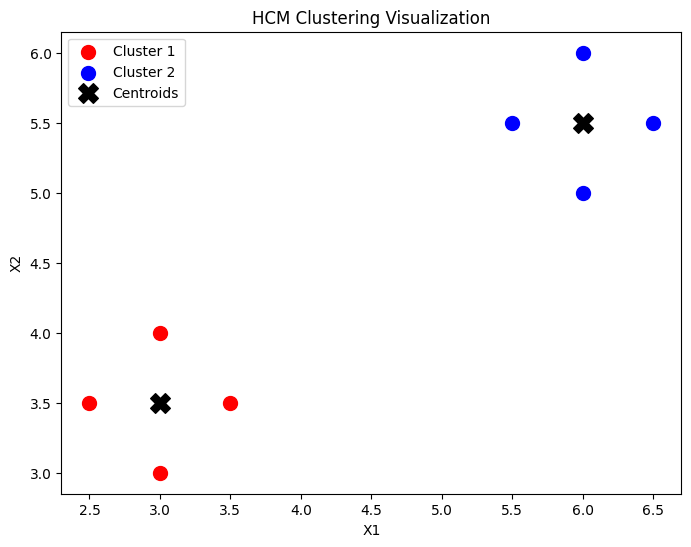

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given 2D data vectors
X = np.array([[2.5, 3.0, 3.0, 3.5, 5.5, 6.0, 6.0, 6.5],
              [3.5, 3.0, 4.0, 3.5, 5.5, 6.0, 5.0, 5.5]])

# Transpose to have points as (x, y) pairs
X = X.T  # Shape (8, 2)

# Number of clustersa
num_clusters = 2

# Initial partition matrix U(0)
U = np.array([
    [1, 1, 0, 0, 1, 0, 1, 0],  # Cluster 1
    [0, 0, 1, 1, 0, 1, 0, 1]   # Cluster 2
])
'''

# Generate random initial partition matrix U(0) and normalize it
np.random.seed(0)  # For reproducibility
U = np.random.rand(num_clusters, X.shape[0])
U = U / U.sum(axis=0)  # Normalize so that each column sums to 1


# Generate random initial partition matrix U(0) with binary values
np.random.seed(0)  # For reproducibility
random_assignments = np.random.randint(0, num_clusters, size=X.shape[0])
U = np.zeros((num_clusters, X.shape[0]))

# Assign each point to a randomly chosen cluster
for i in range(X.shape[0]):
    U[random_assignments[i], i] = 1
'''
print(U)

def get_labels_from_partition_matrix(U):
    #Derive the labels from the initial partition matrix U.

    return np.argmax(U, axis=0)

def update_centroids(X, labels, num_clusters):
    #Update centroids as the mean of all points assigned to each cluster.

    new_centroids = np.zeros((num_clusters, X.shape[1]))
    for k in range(num_clusters):
        points_in_cluster = X[labels == k]
        if len(points_in_cluster) > 0:
            new_centroids[k] = points_in_cluster.mean(axis=0)
    return new_centroids

def compute_distances(X, centroids):
    """
    Compute the Euclidean distance between each data point and each centroid.
    """
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

def update_clusters(distances):
    #Assign each data point to the closest centroid.

    return np.argmin(distances, axis=1)  # Returns the index of the closest centroid for each point

def quality_index(X, centroids, labels):

    #Calculate the Quality Index (J-index) for the clustering.

    N = X.shape[0]
    global_centroid = X.mean(axis=0)
    compactness = 0
    separation = 0

    # Calculate the compactness (sum of the minimum distances from each point to its assigned centroid)
    for i in range(N):
        cluster = labels[i]
        compactness += np.linalg.norm(X[i] - centroids[cluster])

    # Calculate the separation (distance between the centroids and the global centroid)
    for centroid in centroids:
        separation += np.linalg.norm(centroid - global_centroid)

    # J-index is the ratio of compactness to separation
    J = compactness / separation
    return J

def update_rotation_matrix(centroids, previous_centroids):

    #Update the rotation matrix based on the change in centroids.

    # Compute the change in centroid positions
    change = centroids - previous_centroids
    rotation_matrix = np.dot(change.T, change)
    return rotation_matrix

def hcm(X, labels, num_clusters, max_iters=100, tol=1e-4):
    #Hard C-Means (HCM) clustering algorithm.
    # Step 1: Initialize centroids using initial cluster assignments
    centroids = update_centroids(X, labels, num_clusters)
    prev_centroids = np.copy(centroids)  # Keep track of previous centroids

    for i in range(max_iters):
        # Step 2: Compute distances between points and centroids
        distances = compute_distances(X, centroids)

        # Step 3: Assign clusters
        new_labels = update_clusters(distances)

        # Step 4: Update centroids
        new_centroids = update_centroids(X, new_labels, num_clusters)

        # Check for convergence (if centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:

            break

        # Calculate Quality Index after each update
        J = quality_index(X, new_centroids, new_labels)
        print(f"Iteration {i+1}, J-index: {J:.4f}")

        # Update the rotation matrix based on centroid changes
        rotation_matrix = update_rotation_matrix(new_centroids, prev_centroids)

        # Prepare for the next iteration
        centroids = new_centroids
        labels = new_labels
        prev_centroids = np.copy(centroids)

    return labels, centroids

def plot_clusters(X, labels, centroids):
    """
    Plot the clustered data points and centroids.
    """
    plt.figure(figsize=(8, 6))
    colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    for i in range(num_clusters):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], s=100, color=colors[i % len(colors)], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='k', marker='X', label='Centroids')
    plt.title('HCM Clustering Visualization')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

# Get initial labels from partition matrix U
initial_labels = get_labels_from_partition_matrix(U)

# Run the HCM algorithm on the given data
labels, centroids = hcm(X, initial_labels, num_clusters)

# Print the final cluster assignments and centroids
print("Cluster Assignments:", labels)
print("Centroids:", centroids)

# Plot the clusters
plot_clusters(X, labels, centroids)


In [3]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.8 MB/s eta 0:00:00


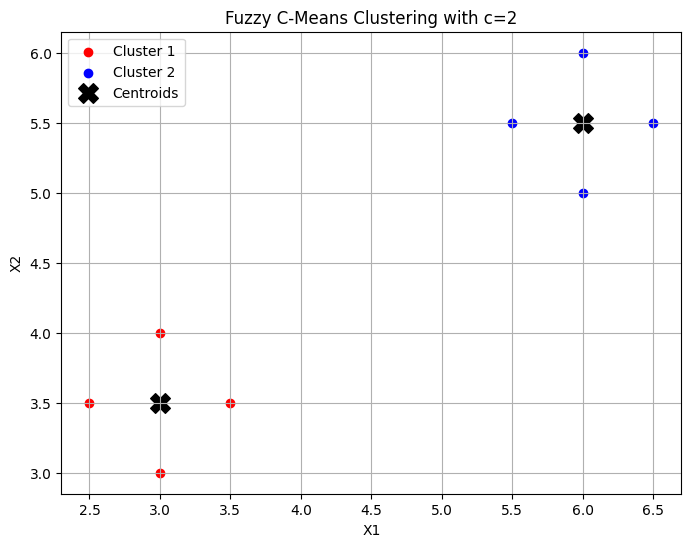

Number of clusters: 2
Centroids:
 [[2.99920061 3.49949605]
 [6.00080222 5.50050568]]
Criterion function value (jm): [17.50645141 12.65428729  5.07623519  1.97969202  1.9615979 ]
Partition coefficient (fpc): 0.962351874760307




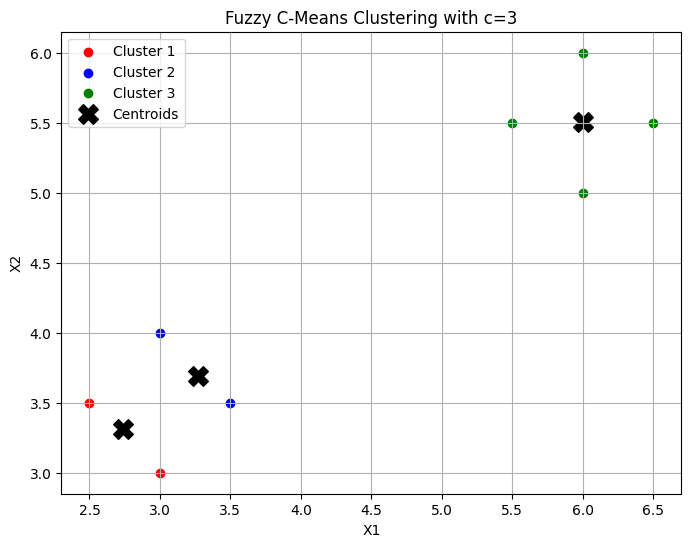

Number of clusters: 3
Centroids:
 [[2.74092077 3.31411229]
 [3.2677211  3.68888509]
 [6.00470601 5.50303897]]
Criterion function value (jm): [12.93146149  6.41263518  1.92021976  1.43627514  1.400148    1.37622267
  1.37222714  1.37200902  1.37199497]
Partition coefficient (fpc): 0.8108544966686724




In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Given dataset (Example dataset for demonstration)
X_example = np.array([[2.5, 3.0, 3.0, 3.5, 5.5, 6.0, 6.0, 6.5],
                      [3.5, 3.0, 4.0, 3.5, 5.5, 6.0, 5.0, 5.5]])

def run_fcm_and_plot(X, c_values):
    """
    Run Fuzzy C-Means clustering on given data with different number of clusters.
    Plot the resulting clusters and centroids.

    Parameters:
    X: np.ndarray : Data points (2D)
    c_values: list : List of cluster counts to evaluate
    """
    for c in c_values:
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X, c, 2, error=0.005, maxiter=1000, init=None)

        # Classify each point to the closest cluster
        cluster_membership = np.argmax(u, axis=0)

        # Plot the data points and centroids
        plt.figure(figsize=(8, 6))
        colors = ['r', 'b', 'g', 'y', 'm', 'c']
        for j in range(c):
            plt.scatter(X[0, cluster_membership == j],
                        X[1, cluster_membership == j],
                        color=colors[j % len(colors)],
                        label=f'Cluster {j+1}')

        # Plot centroids
        plt.scatter(cntr[:, 0], cntr[:, 1], color='k', marker='X', s=200, label='Centroids')

        plt.title(f'Fuzzy C-Means Clustering with c={c}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print the criterion function value and centroids
        print(f"Number of clusters: {c}")
        print("Centroids:\n", cntr)
        print("Criterion function value (jm):", jm)
        print("Partition coefficient (fpc):", fpc)
        print("\n")

# Example usage: Evaluate with different cluster counts
run_fcm_and_plot(X_example, c_values=[2, 3])
